In [199]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

# Initialising the Parameters

In [209]:
Nmics = 64
Nsamp = 200

src = (0, 0)

pitch = 0.1

dist_per_samp = 0.1
# Speed of sound in the medium
C = 0.5
# Time dilation factor for sinc pulse: how narrow
SincP = 5

# Finding the position of the mics
mics = [(0,pitch*y) for y in range (-(Nmics//2) , Nmics//2 +1) ]
if Nmics%2 == 0:
    mics.remove((0,0))
mics = np.array(mics)

# Location of point obstacle
obstacle = (3, -1)

In [210]:
t =np.array([i*dist_per_samp/C for i in range(Nsamp)])# Nsamp time instants with spacing of dist_per_samp
def wsrc(t):
    return np.sinc(SincP*t)

**The diagram similar to two sinc plots given in the question can be plotted by adjusting the value of C(increased) and it is shown as follows:**

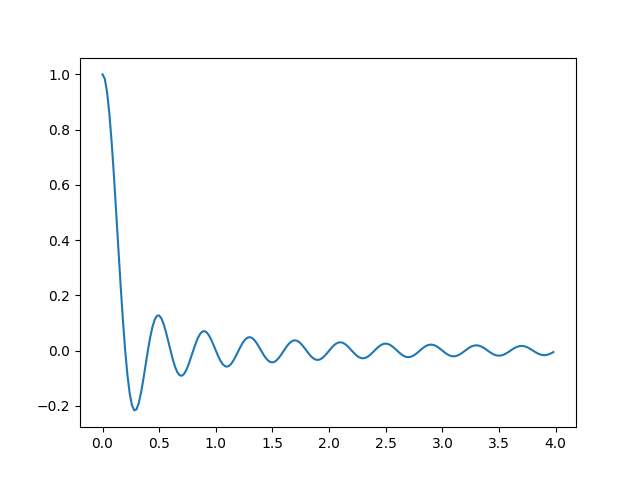

In [211]:
c_test=5 
t_test =np.array([i*dist_per_samp/c_test for i in range(Nsamp)])
wsrc_values = wsrc(t_test)
plt.close("all")
plt.plot(t_test,wsrc_values)
plt.show()

In [212]:
# Distance from src to a mic after reflecting through pt
def dist(src, pt, mic):
    d1 =np.linalg.norm(np.array(pt) - np.array(src)) 
    d2 =np.linalg.norm(np.array(mic) - np.array(pt))
    return d1 + d2

#  Generating Mic Output

In [213]:
delay = [dist(src, obstacle, i) / C for i in mics]

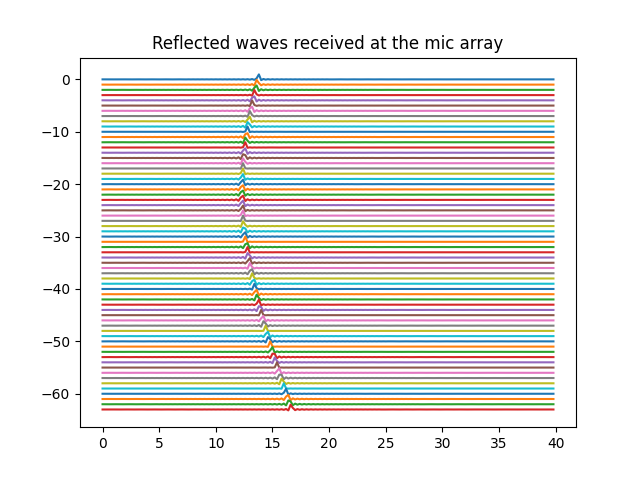

In [216]:
mic_samples = []
plt.close("all") 

for i in range(Nmics):
    offset = i * (-1)
    sinc = wsrc(t - delay[i])
    mic_samples.append(sinc)
    plt.plot(t,np.array(sinc + offset))
plt.title('Reflected waves received at the mic array')
plt.show()

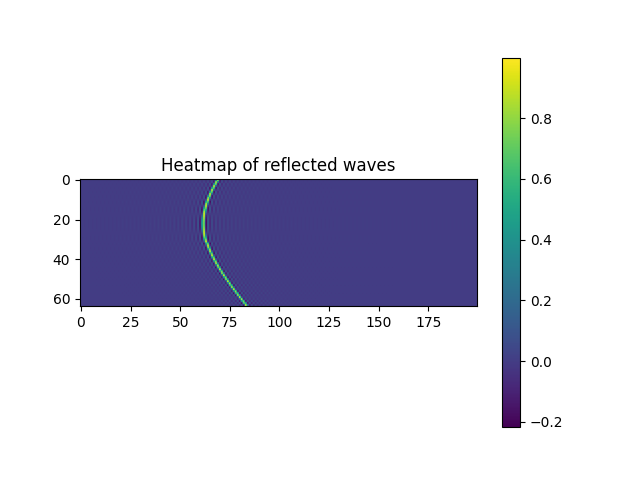

In [217]:
plt.close('all')
plt.title("Heatmap of reflected waves")
plt.imshow(np.array(mic_samples))
plt.colorbar()

***
# DAS

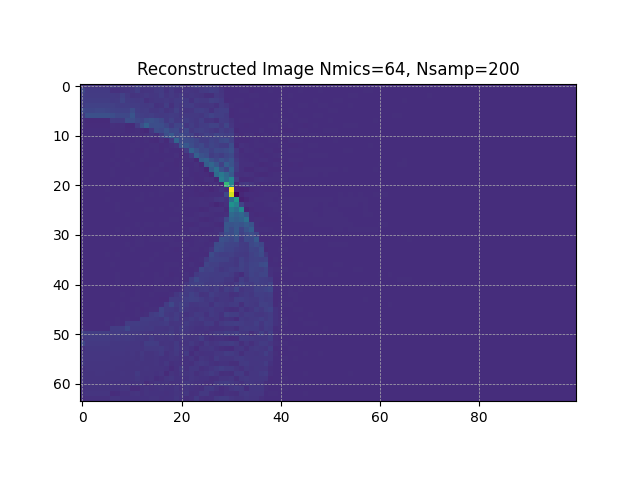

In [218]:
time_per_samp = dist_per_samp / C
grid = np.zeros((Nmics, Nsamp//2)) # For storing the extimated value for all points (i,j)
    
# Iterate over all microphones and samples
for i in range(Nmics):
    for j in range(Nsamp//2):
        # Calculate the delay for each microphone
        delay = np.array([dist(src, (t[j]*C, mics[i][1]), ind) / C for ind in mics])
        # Determine which microphones are valid
        valid_mics = np.logical_and(t[0] <= delay, delay < t[-1])
        # Calculate the indices for the valid microphones
        indices = ((t[0] + delay[valid_mics]) // time_per_samp).astype(int)
        # Add the sum of the valid microphone samples to the grid
        grid[i,j] += np.array(mic_samples)[valid_mics, indices].sum()
            

plt.close("all")        
plt.imshow(grid)
plt.title(f'Reconstructed Image Nmics={Nmics}, Nsamp={Nsamp}')
# plt.colorbar(label='Amplitude')
plt.grid(True, linestyle='--', linewidth=0.5)

# Rx2.txt & Rx3.txt

In [219]:
def das(mic_samples, Nmics = 64, Nsamp = 200, src = (0,0), pitch = 0.1, dist_per_samp = 0.1, C = 0.5):
    # Calculating the locations of the microphones
    mics = [(0,pitch*y) for y in range (-(Nmics//2) , Nmics//2 +1) ]
    # If the number of microphones is even, remove the one at the origin
    if Nmics%2 == 0:
        mics.remove((0,0))  
    mics = np.array(mics)
    

    time_per_samp = dist_per_samp / C
    t = np.array([i * time_per_samp for i in range(Nsamp)])
    
    # Calculate the delay for each microphone
    delay = [dist(src, obstacle, i) / C for i in mics]
    
    # Initialize a grid to store the estimated value for all points (i,j)
    grid = np.zeros((Nmics, Nsamp//2)) 
    
    # Iterate over all microphones and samples
    for i in range(Nmics):
        for j in range(Nsamp//2):
            # Calculate the delay for each microphone
            delay = np.array([dist(src, (t[j]*C, mics[i][1]), ind) / C for ind in mics])
            # Determine which microphones are valid
            valid_mics = np.logical_and(t[0] <= delay, delay < t[-1])
            # Calculate the indices for the valid microphones
            indices = ((t[0] + delay[valid_mics]) // time_per_samp).astype(int)
            # Add the sum of the valid microphone samples to the grid
            grid[i,j] += mic_samples[valid_mics, indices].sum()
            
    plt.close("all")        
    plt.imshow(grid)
    plt.title('Reconstructed Image')
    plt.colorbar(label='Amplitude')
    plt.grid(True, linestyle='--', linewidth=0.5)

In [220]:
data1 = np.loadtxt("rx2.txt")
data2 = np.loadtxt("rx3.txt")

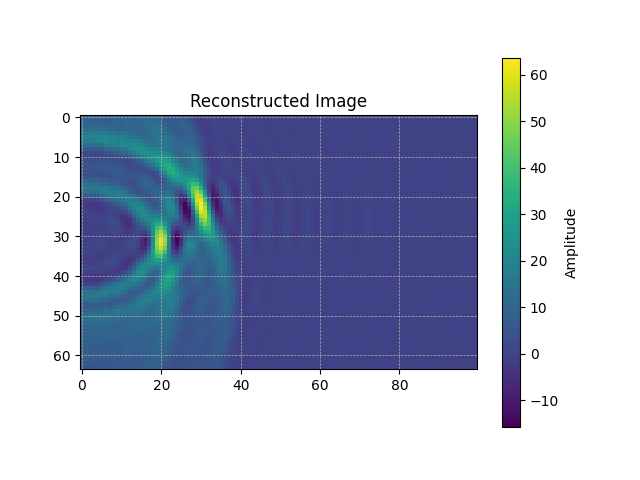

In [223]:
das(data1)

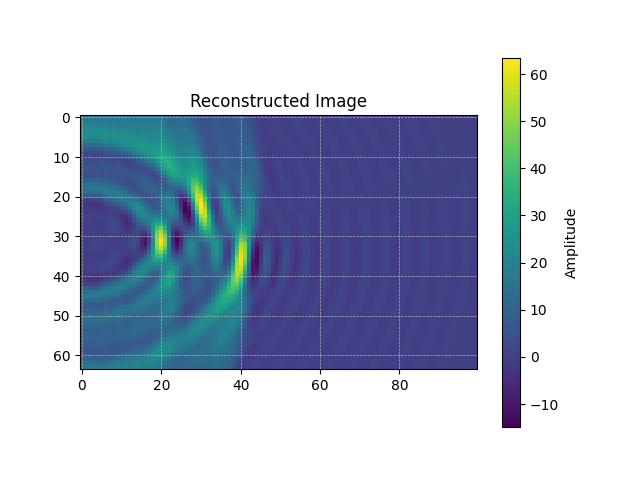

In [222]:
das(data2)